# 策略

> 定期定額

In [63]:
import yfinance as yf

# 下載VTI的數據
VTI = yf.download('VTI', start='2010-01-01',end='2023-12-31')
VTI

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,56.860001,57.380001,56.840000,57.310001,44.335243,2251500
2010-01-05,57.340000,57.540001,57.110001,57.529999,44.505436,1597700
2010-01-06,57.500000,57.720001,57.410000,57.610001,44.567318,2120300
2010-01-07,57.549999,57.889999,57.290001,57.849998,44.752979,1656700
2010-01-08,57.700001,58.049999,57.560001,58.040001,44.899979,1650000
...,...,...,...,...,...,...
2023-12-22,236.589996,237.520004,235.639999,236.630005,236.630005,3661900
2023-12-26,236.979996,238.309998,236.860001,237.800003,237.800003,3829400
2023-12-27,238.000000,238.440002,237.470001,238.250000,238.250000,5103700


- - -

<img src="./14.png" height="600"/>

In [83]:
import pandas as pd
import numpy as np

# 找到每個月的第一個交易日
VTI['month'] = VTI.index.to_period('M')
first_days = VTI.groupby('month').first()

# 計算每個月的投資金額和購買的股數，並將股數四捨五入到最接近的整數
first_days['investment'] = 500
first_days['shares'] = (first_days['investment'] / first_days['Adj Close']).apply(np.floor)

# 計算累計的投資金額和股數
first_days['cumulative_investment'] = first_days['investment'].cumsum()
first_days['cumulative_shares'] = first_days['shares'].cumsum()

# 計算資產總額、總投入成本、當年報酬率和總報酬率
latest_prices = VTI.groupby('month')['Adj Close'].last()
first_days['total_value'] = first_days['cumulative_shares'] * latest_prices
first_days['total_cost'] = first_days['cumulative_investment']
first_days['annual_return'] = first_days['total_value'].pct_change(12) * 100  # 假設每年有12個月
first_days['total_return'] = (first_days['total_value'] / first_days['total_cost'] - 1) * 100

# 對於第一年的annual_return，使用第一年最後一天的價格與第一天的價格進行比較
first_year = first_days.index.year[0]
first_days.loc[first_days.index.year == first_year, 'annual_return'] = (first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[-1] / first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[0] - 1) * 100

# 建立一個新的DataFrame，按年份列出資產總額、總投入成本、持股總數、當年報酬率和總報酬率
first_days['year'] = first_days.index.year
annual_summary = first_days.groupby('year').last()[['total_value', 'total_cost', 'cumulative_shares', 'annual_return', 'total_return']]

annual_summary

,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6554.65,6000,128.00,1316.96,9.24
2011,12305.59,12000,238.00,87.74,2.55
2012,20290.83,18000,337.00,64.89,12.73
2013,33586.44,24000,418.00,65.53,39.94
2014,43679.51,30000,483.00,30.05,45.60
2015,49279.88,36000,543.00,12.82,36.89
2016,61739.72,42000,603.00,25.28,47.00
2017,80793.99,48000,651.00,30.86,68.32
2018,81269.03,54000,691.00,0.59,50.50


- - -

<img src="./16.png" height="400"/>

- - -

<img src="./17.png" height="600"/>

In [3]:
import pandas as pd
import numpy as np

# 找到每個月的第一個交易日
VTI['month'] = VTI.index.to_period('M')
first_days = VTI.groupby('month').first()

# 計算每個月的投資金額和購買的股數，並將股數四捨五入到最接近的整數
first_days['investment'] = 500
first_days['shares'] = (first_days['investment'] / first_days['Adj Close']).apply(np.floor)

# 計算累計的投資金額和股數
first_days['cumulative_investment'] = first_days['investment'].cumsum()
first_days['cumulative_shares'] = first_days['shares'].cumsum()

# 計算資產總額、總投入成本、當年報酬率和總報酬率
latest_prices = VTI.groupby('month')['Adj Close'].last()
first_days['total_value'] = first_days['cumulative_shares'] * latest_prices
first_days['total_cost'] = first_days['cumulative_investment']
first_days['annual_return'] = first_days['total_value'].pct_change(12) * 100  # 假設每年有12個月
first_days['total_return'] = (first_days['total_value'] / first_days['total_cost'] - 1) * 100

# 對於第一年的annual_return，使用(投資現值 - 投資成本) / 投資成本 * 100%的公式
first_year = first_days.index.year[0]
first_days.loc[first_days.index.year == first_year, 'annual_return'] = ((first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[-1] - first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) / first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) * 100

# 建立一個新的DataFrame，按年份列出資產總額、總投入成本、持股總數、當年報酬率和總報酬率
first_days['year'] = first_days.index.year
annual_summary = first_days.groupby('year').last()[['total_value', 'total_cost', 'cumulative_shares', 'annual_return', 'total_return']]
annual_summary

,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6554.647949,6000,128.0,9.244132,9.244132
2011,12305.588882,12000,238.0,87.738365,2.546574
2012,20290.826256,18000,337.0,64.891144,12.726813
2013,33586.436493,24000,418.0,65.525228,39.943485
2014,43679.517906,30000,483.0,30.051064,45.598393
2015,49279.888939,36000,543.0,12.821504,36.888580
2016,61739.711266,42000,603.0,25.283787,46.999313
2017,80794.016075,48000,651.0,30.862316,68.320867
2018,81269.021797,54000,691.0,0.587922,50.498189


- - -

寫成function

In [179]:
import pandas as pd
import numpy as np
import yfinance as yf
def get_annual_summary(stock_symbol, start_date):
    # 下載股票數據
    stock_data = yf.download(stock_symbol, start=start_date, end='2023-12-31')

    # 找到每個月的第一個交易日
    stock_data['month'] = stock_data.index.to_period('M')
    first_days = stock_data.groupby('month').first()

    # 計算每個月的投資金額和購買的股數，並將股數四捨五入到最接近的整數
    first_days['investment'] = 500
    first_days['shares'] = (first_days['investment'] / first_days['Adj Close'])

    # 計算累計的投資金額和股數
    first_days['cumulative_investment'] = first_days['investment'].cumsum()
    first_days['cumulative_shares'] = first_days['shares'].cumsum()

    # 計算資產總額、總投入成本、當年報酬率和總報酬率
    latest_prices = stock_data.groupby('month')['Adj Close'].last()
    first_days['total_value'] = first_days['cumulative_shares'] * latest_prices
    first_days['total_cost'] = first_days['cumulative_investment']
    first_days['annual_return'] = first_days['total_value'].pct_change(12) * 100  # 假設每年有12個月
    first_days['total_return'] = (first_days['total_value'] / first_days['total_cost'] - 1) * 100

    # 對於第一年的annual_return，使用(投資現值 - 投資成本) / 投資成本 * 100%的公式
    first_year = first_days.index.year[0]
    first_days.loc[first_days.index.year == first_year, 'annual_return'] = ((first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[-1] - first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) / first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) * 100

    # 建立一個新的DataFrame，按年份列出資產總額、總投入成本、持股總數、當年報酬率和總報酬率
    first_days['year'] = first_days.index.year
    annual_summary = first_days.groupby('year').last()[['total_value', 'total_cost', 'cumulative_shares', 'annual_return', 'total_return']]
    
    return annual_summary


In [180]:
def get_annual_return(annual_summary):
    Total = float(annual_summary['total_value'].iloc[-1])
    cost = float(annual_summary['total_cost'].iloc[-1])
    year = float(annual_summary.shape[0])
    return ((Total / cost) ** (1 / year) - 1)*100


In [181]:
VTI_annual=get_annual_summary('VTI', '2010-01-01')
VTI_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6852.77,6000,133.82,14.21,14.21
2011,12885.17,12000,249.21,88.03,7.38
2012,21337.76,18000,354.39,65.60,18.54
2013,35437.78,24000,441.04,66.08,47.66
2014,46367.39,30000,512.72,30.84,54.56
2015,52500.72,36000,578.49,13.23,45.84
2016,65796.03,42000,642.62,25.32,56.66
2017,86415.60,48000,696.30,31.34,80.03
2018,87375.63,54000,742.92,1.11,61.81


In [182]:
get_annual_return(VTI_annual)

7.007867286002956

In [183]:
VT_annual=get_annual_summary('VT', '2010-01-01')
VT_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6771.82,6000,190.20,12.86,12.86
2011,11864.48,12000,360.30,75.20,-1.13
2012,20375.72,18000,528.30,71.74,13.20
2013,31801.18,24000,670.69,56.07,32.50
2014,39055.80,30000,794.46,22.81,30.19
2015,44136.05,36000,914.82,13.01,22.60
2016,54267.90,42000,1036.73,22.96,29.21
2017,74255.40,48000,1139.45,36.83,54.70
2018,72380.82,54000,1230.85,-2.52,34.04


In [184]:
get_annual_return(VT_annual)

4.92551286089864

In [185]:
BND_annual=get_annual_summary('BND', '2010-01-01')
BND_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6114.62,6000,109.09,1.91,1.91
2011,12869.16,12000,212.73,110.47,7.24
2012,19296.11,18000,309.86,49.94,7.20
2013,24839.40,24000,407.46,28.73,3.50
2014,32433.58,30000,502.79,30.57,8.11
2015,38595.18,36000,594.98,19.00,7.21
2016,45512.99,42000,684.36,17.92,8.36
2017,53443.42,48000,772.71,17.42,11.34
2018,59612.35,54000,860.90,11.54,10.39


In [186]:
get_annual_return(BND_annual)

0.6757915565754447

<img src="./20.png" height="600"/>

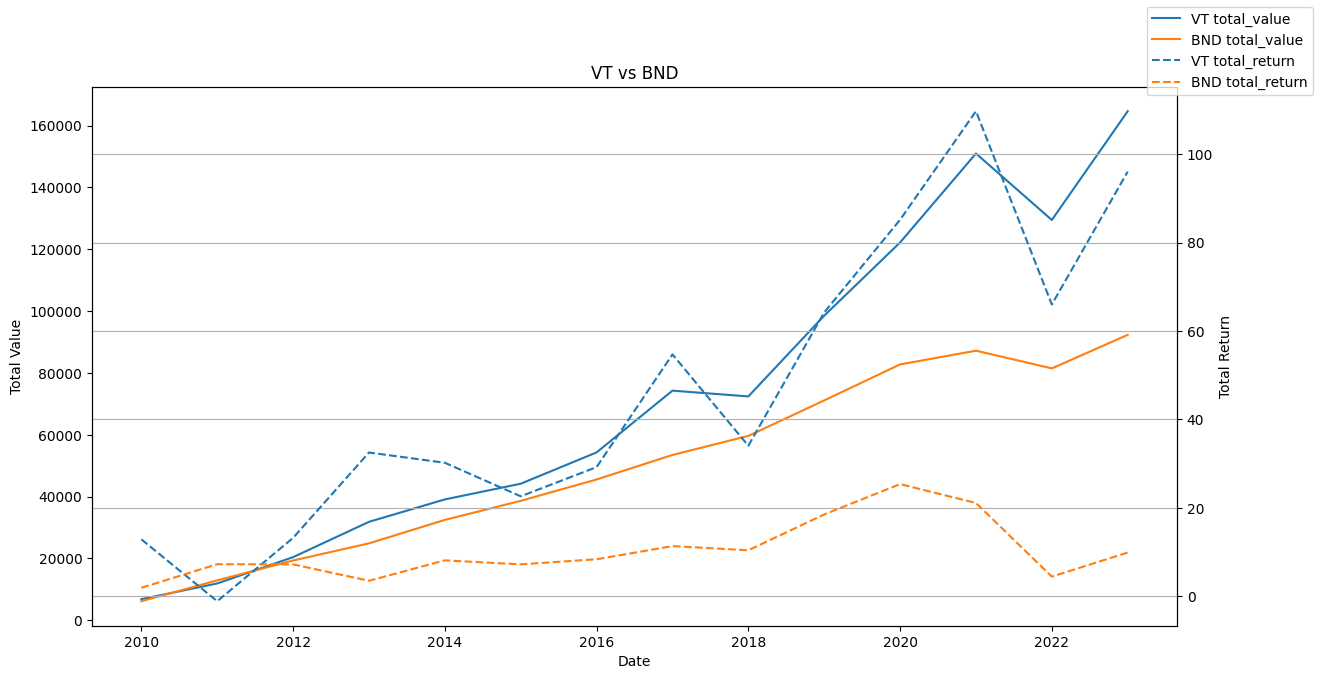

In [187]:
import matplotlib.pyplot as plt

# 假設VT_annual和BND_annual都是Pandas DataFrame，並且它們的索引是日期
fig, ax1 = plt.subplots(figsize=(14, 7))

# 繪製total_value
ax1.plot(VT_annual.index, VT_annual['total_value'], label='VT total_value')
ax1.plot(BND_annual.index, BND_annual['total_value'], label='BND total_value')

# 創建第二個y軸
ax2 = ax1.twinx()

# 繪製total_return
ax2.plot(VT_annual.index, VT_annual['total_return'], label='VT total_return', linestyle='--')
ax2.plot(BND_annual.index, BND_annual['total_return'], label='BND total_return', linestyle='--')

# 設置圖表標題和軸標籤
ax1.set_title('VT vs BND')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Value')
ax2.set_ylabel('Total Return')
plt.grid(True)
# 顯示圖例
fig.legend()

plt.show()

# 進階策略

以VIX為基準，每次增加就買入的策略。

當VIX超過21的時候買入1000元的VTI，每次VIX增加5就再買入1000，直到VIX回到21就重新下一輪。

[*********************100%%**********************]  1 of 1 completed


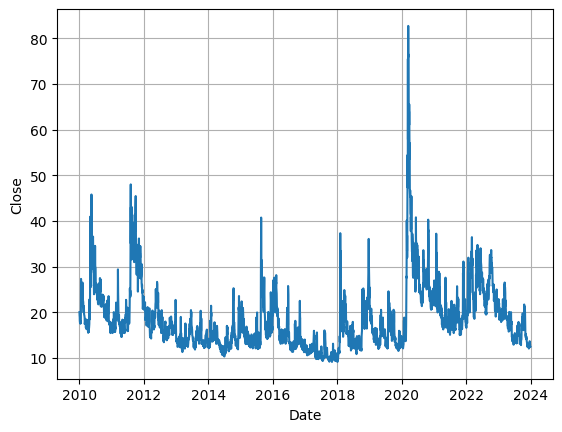

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,21.68,21.68,20.03,20.04,20.04,0
2010-01-05,20.05,20.13,19.34,19.35,19.35,0
2010-01-06,19.59,19.68,18.77,19.16,19.16,0
2010-01-07,19.68,19.71,18.70,19.06,19.06,0
2010-01-08,19.27,19.27,18.11,18.13,18.13,0
...,...,...,...,...,...,...
2023-12-22,13.72,13.96,13.00,13.03,13.03,0
2023-12-26,13.77,13.80,12.96,12.99,12.99,0
2023-12-27,13.02,13.04,12.37,12.43,12.43,0


In [127]:
import yfinance as yf

# 下載VTI的數據
VIX = yf.download('^VIX', start='2010-01-01',end='2023-12-31')
import matplotlib.pyplot as plt

# Plotting the graph
plt.plot(VIX.index, VIX['Close'])

# Setting the x-axis label and y-axis label
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
# Displaying the graph
plt.show()
VIX

- - -

In [88]:
VIX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3522.00,3522.00,3522.00,3522.00,3522.00,3522.00
mean,18.72,19.71,17.76,18.57,18.57,0.00
std,7.16,7.82,6.50,7.11,7.11,0.00
min,9.01,9.31,8.56,9.14,9.14,0.00
25%,13.78,14.34,13.23,13.65,13.65,0.00
50%,16.92,17.72,16.13,16.82,16.82,0.00
75%,21.74,22.89,20.69,21.48,21.48,0.00
max,82.69,85.47,70.37,82.69,82.69,0.00


In [89]:
VTI.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3522.00,3522.00,3522.00,3522.00,3522.00,3522.00
mean,129.41,130.09,128.60,129.41,118.02,2969506.53
std,53.66,53.98,53.30,53.66,56.78,1918709.25
min,52.37,52.69,29.76,52.08,40.64,351900.00
25%,85.27,85.70,84.91,85.31,70.55,1814275.00
50%,116.83,117.07,116.32,116.74,103.50,2531750.00
75%,166.12,166.69,164.91,166.14,156.46,3508300.00
max,243.73,244.06,242.43,242.97,238.25,22272400.00


- - -

<img src="./19.png" height="600"/>

In [96]:
import pandas as pd
import numpy as np

def calculate_strategy(VTI, VIX):
    # 初始化變量
    total_cost = 0
    total_shares = 0
    total_value = 0
    annual_return = 0
    total_return = 0
    buy_trigger = 21
    last_vix = 0
    last_year = VTI.index[0].year
    last_year_cost = 0

    results = []

    # 遍歷每一天
    for i in range(len(VTI)):
        current_year = VTI.index[i].year

        # 如果VIX超過21，則買入1000元的VTI
        if VIX[i] > buy_trigger:
            shares = 1000 / VTI[i]
            total_cost += 1000
            total_shares += shares

            # 每次VIX增加5就再買入1000
            if last_vix != 0 and VIX[i] - last_vix >= 5:
                shares = 1000 / VTI[i]
                total_cost += 1000
                total_shares += shares

            last_vix = VIX[i]

        # 如果VIX回到21，則重新下一輪
        elif VIX[i] <= 21:
            buy_trigger = 21
            last_vix = 0

        # 計算資產總額、總投入成本、持股總數、當年報酬率和總報酬率
        total_value = total_shares * VTI[i]
        annual_return = ((total_value - total_cost + last_year_cost) / (total_cost - last_year_cost) if total_cost != last_year_cost else 0) * 100
        total_return = ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100

        # 如果年份已經改變，則列印並重置變量
        if current_year != last_year:
            results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])
            last_year = current_year
            last_year_cost = total_cost

    # 加入最後一年的結果
    results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])

    return pd.DataFrame(results, columns=['Year', 'Total Value', 'Total Cost', 'Cumulative Shares', 'Annual Return', 'Total Return'])

# 假設你已經有VTI和VIX的DataFrame
VTI_prices = VTI['Close']
VIX_values = VIX['Close']

results = calculate_strategy(VTI_prices, VIX_values)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,172223.87,148000,2625.36,16.37,16.37
1,2011,308204.36,279000,4726.34,135.27,10.47
2,2012,389684.68,310000,5186.11,1157.05,25.70
3,2013,493095.82,310000,5186.11,0.00,59.06
4,2014,559129.83,319000,5278.79,6112.55,75.28
5,2015,576942.08,353000,5615.55,1596.89,63.44
6,2016,690734.77,385000,5944.36,2058.55,79.41
7,2017,821629.63,385000,5944.36,0.00,113.41
8,2018,806198.06,434000,6311.74,1545.30,85.76
9,2019,1049713.40,441000,6362.67,14895.91,138.03


- - -

<img src="./18.png" height="600"/>

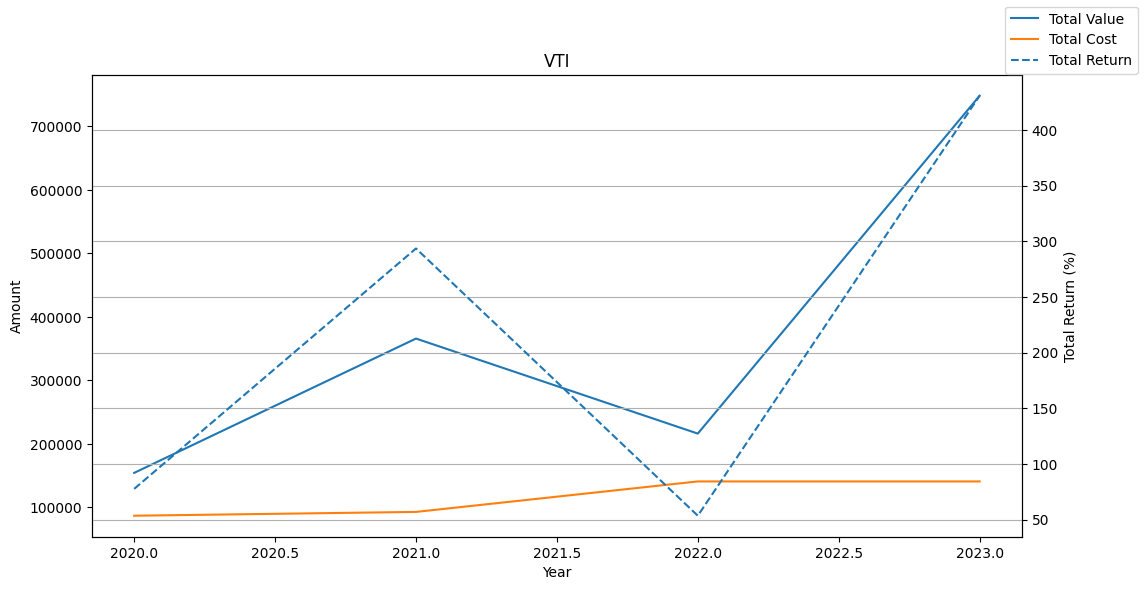

In [128]:
import matplotlib.pyplot as plt

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Total Value and Total Cost
ax1.plot(results['Year'], results['Total Value'], label='Total Value')
ax1.plot(results['Year'], results['Total Cost'], label='Total Cost')

# Setting the x-axis label and y-axis label for Total Value and Total Cost
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount')
ax1.ticklabel_format(style='plain')

# Creating the second y-axis for Total Return
ax2 = ax1.twinx()

# Plotting Total Return as a dashed line
ax2.plot(results['Year'], results['Total Return'], linestyle='--', label='Total Return')

# Setting the y-axis label for Total Return
ax2.set_ylabel('Total Return (%)')

# Setting the title
plt.title('VTI')

# Displaying the legend
fig.legend()
plt.grid(True)
# Displaying the graph
plt.show()


- - -

修改為VIX>30買入 VIX每增加5再買進

In [110]:
import pandas as pd
import numpy as np

def calculate_strategy(VTI, VIX, buy_trigger, increment):
    # 初始化變量
    total_cost = 0
    total_shares = 0
    total_value = 0
    annual_return = 0
    total_return = 0
    last_vix = 0
    last_year = VTI.index[0].year
    last_year_cost = 0

    results = []

    # 遍歷每一天
    for i in range(len(VTI)):
        current_year = VTI.index[i].year

        # 如果VIX超過buy_trigger，則買入1000元的VTI
        if VIX[i] > buy_trigger:
            shares = 1000 / VTI[i]
            total_cost += 1000
            total_shares += shares

            # 每次VIX增加increment就再買入1000
            if last_vix != 0 and VIX[i] - last_vix >= increment:
                shares = 1000 / VTI[i]
                total_cost += 1000
                total_shares += shares

            last_vix = VIX[i]

        # 如果VIX回到buy_trigger，則重新下一輪
        elif VIX[i] <= buy_trigger:
            last_vix = 0

        # 計算資產總額、總投入成本、持股總數、當年報酬率和總報酬率
        total_value = total_shares * VTI[i]
        annual_return = ((total_value - total_cost + last_year_cost) / (total_cost - last_year_cost) if total_cost != last_year_cost else 0) * 100
        total_return = ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100

        # 如果年份已經改變，則列印並重置變量
        if current_year != last_year:
            results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])
            last_year = current_year
            last_year_cost = total_cost

    # 加入最後一年的結果
    results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])

    return pd.DataFrame(results, columns=['Year', 'Total Value', 'Total Cost', 'Cumulative Shares', 'Annual Return', 'Total Return'])

# 假設你已經有VTI和VIX的DataFrame
VTI_prices = VTI['Close']
VIX_values = VIX['Close']

# 設定你的buy_trigger和increment
my_buy_trigger = 30
my_increment = 5

results = calculate_strategy(VTI_prices, VIX_values, my_buy_trigger, my_increment)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,29686.67,25000,452.54,18.75,18.75
1,2011,113166.50,103000,1735.42,45.09,9.87
2,2012,130399.18,103000,1735.42,0.00,26.60
3,2013,165003.39,103000,1735.42,0.00,60.20
4,2014,183815.30,103000,1735.42,0.00,78.46
5,2015,182461.65,107000,1775.96,4461.54,70.52
6,2016,206366.01,107000,1775.96,0.00,92.87
7,2017,245472.56,107000,1775.96,0.00,129.41
8,2018,232935.03,113000,1823.65,3782.25,106.14
9,2019,300866.04,113000,1823.65,0.00,166.25


- - -

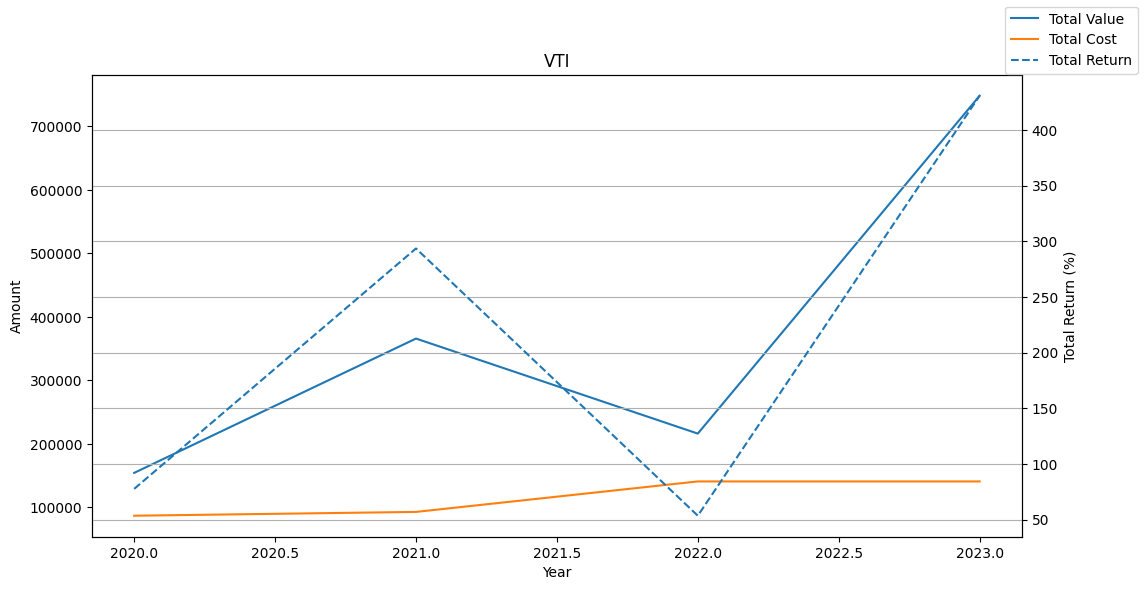

In [129]:
import matplotlib.pyplot as plt

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Total Value and Total Cost
ax1.plot(results['Year'], results['Total Value'], label='Total Value')
ax1.plot(results['Year'], results['Total Cost'], label='Total Cost')

# Setting the x-axis label and y-axis label for Total Value and Total Cost
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount')
ax1.ticklabel_format(style='plain')

# Creating the second y-axis for Total Return
ax2 = ax1.twinx()

# Plotting Total Return as a dashed line
ax2.plot(results['Year'], results['Total Return'], linestyle='--', label='Total Return')

# Setting the y-axis label for Total Return
ax2.set_ylabel('Total Return (%)')

# Setting the title
plt.title('VTI')

# Displaying the legend
fig.legend()
plt.grid(True)
# Displaying the graph
plt.show()


## QQQ

In [116]:
import yfinance as yf

# 下載VTI的數據
QQQ = yf.download('QQQ', start='2010-01-01',end='2023-12-31')
QQQ

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,46.33,46.49,46.27,46.42,40.79,62822800
2010-01-05,46.39,46.50,46.16,46.42,40.79,62935600
2010-01-06,46.40,46.55,46.07,46.14,40.54,96033000
2010-01-07,46.21,46.27,45.92,46.17,40.57,77094100
2010-01-08,46.07,46.55,45.93,46.55,40.90,88886600
...,...,...,...,...,...,...
2023-12-22,409.00,409.97,406.48,408.38,408.17,34292400
2023-12-26,409.25,411.56,409.15,410.88,410.66,22722500
2023-12-27,410.95,411.79,410.08,411.50,411.50,31980500


In [117]:
# 假設你已經有VTI和VIX的DataFrame
QQQ_prices = QQQ['Close']
VIX_values = VIX['Close']

# 設定你的buy_trigger和increment
my_buy_trigger = 30
my_increment = 5

results = calculate_strategy(QQQ_prices, VIX_values, my_buy_trigger, my_increment)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,30845.53,25000,557.68,23.38,23.38
1,2011,113197.50,103000,1989.41,45.12,9.90
2,2012,133688.42,103000,1989.41,0.00,29.79
3,2013,173615.91,103000,1989.41,0.00,68.56
4,2014,204789.99,103000,1989.41,0.00,98.83
5,2015,222215.39,107000,2029.36,5455.38,107.68
6,2016,242590.21,107000,2029.36,0.00,126.72
7,2017,321633.96,107000,2029.36,0.00,200.59
8,2018,320520.79,113000,2069.48,5242.01,183.65
9,2019,447338.42,113000,2069.48,0.00,295.87


# NVDA

In [131]:
from datetime import date
start_date = '2020-01-01'
today = date.today()
NVDA = yf.download('NVDA', start=start_date,end=today)
NVDA

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.69,59.98,59.18,59.98,59.74,23753600
2020-01-03,58.78,59.46,58.53,59.02,58.79,20538400
2020-01-06,58.08,59.32,57.82,59.26,59.03,26263600
2020-01-07,59.55,60.44,59.10,59.98,59.75,31485600
2020-01-08,59.94,60.51,59.54,60.10,59.86,27710800
...,...,...,...,...,...,...
2024-02-26,797.00,806.46,785.05,790.92,790.92,50397300
2024-02-27,793.81,794.80,771.62,787.01,787.01,39170500
2024-02-28,776.20,789.33,771.25,776.63,776.63,39311000


In [132]:
# 下載VTI的數據
VIX = yf.download('^VIX', start=start_date,end=today)
VIX

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,13.46,13.72,12.42,12.47,12.47,0
2020-01-03,15.01,16.20,13.13,14.02,14.02,0
2020-01-06,15.45,16.39,13.54,13.85,13.85,0
2020-01-07,13.84,14.46,13.39,13.79,13.79,0
2020-01-08,15.16,15.24,12.83,13.45,13.45,0
...,...,...,...,...,...,...
2024-02-26,14.17,14.20,13.66,13.74,13.74,0
2024-02-27,13.63,13.75,13.41,13.43,13.43,0
2024-02-28,13.52,13.90,13.44,13.84,13.84,0


In [134]:
# 假設你已經有VTI和VIX的DataFrame
NVDA_prices = NVDA['Close']
VIX_values = VIX['Close']

# 設定你的buy_trigger和increment
my_buy_trigger = 30
my_increment = 5

results = calculate_strategy(NVDA_prices, VIX_values, my_buy_trigger, my_increment)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2020,154457.60,87000,1177.85,77.54,77.54
1,2021,365954.36,93000,1214.95,5999.24,293.50
2,2022,216314.93,141000,1511.11,350.66,53.41
3,2023,727869.90,141000,1511.11,0.00,416.22
4,2024,1243323.51,141000,1511.11,0.00,781.79
